In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import (SCL5_DROPPED_PLAYERS,
                                                    SCL5_DIVISIONS,
                                                    SCL5_PICK_MODES,
                                                    SCL5_VENUE_MODES,
                                                    select_scl5)
from triple_agent.reports.mission_choices import mission_choices
from triple_agent.reports.mission_completes import mission_completion_query, mission_completion
from triple_agent.utilities.missions import Missions

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

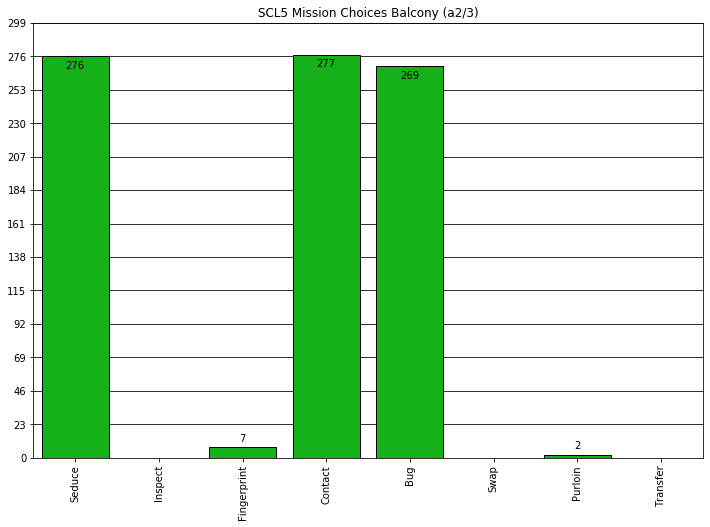

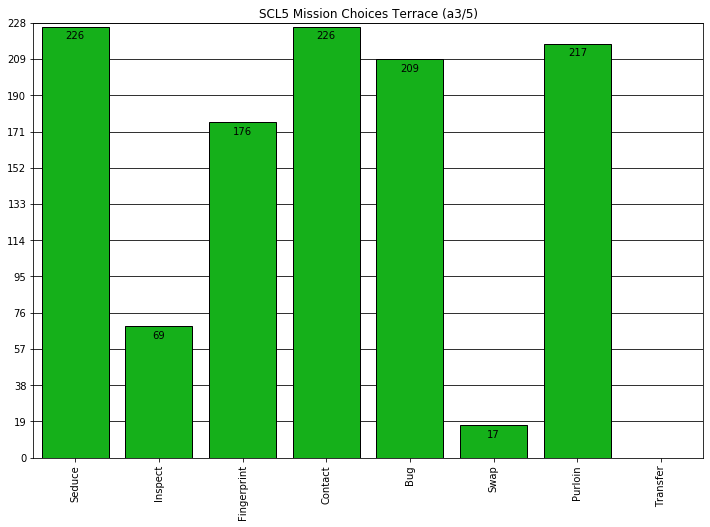

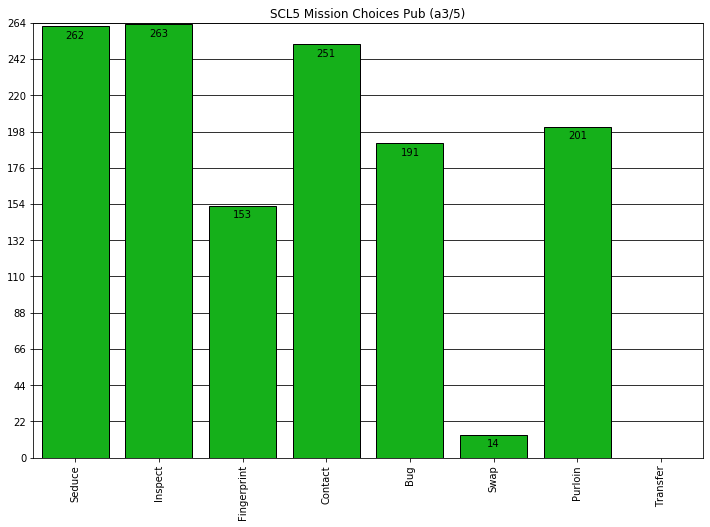

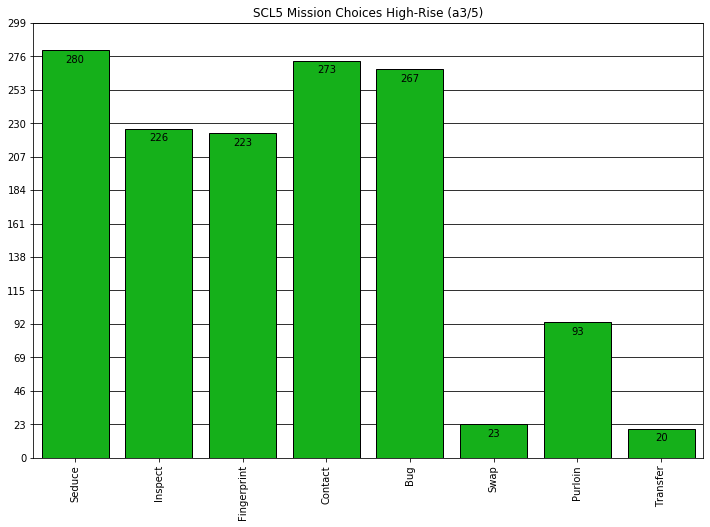

In [5]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, scl5_replays)
    mission_choices(venue_games,
                    f"SCL5 Mission Choices {venue} ({mode})",
                    force_bar=True,
                    category_data_order=sum,
                    percentile_plot=False)

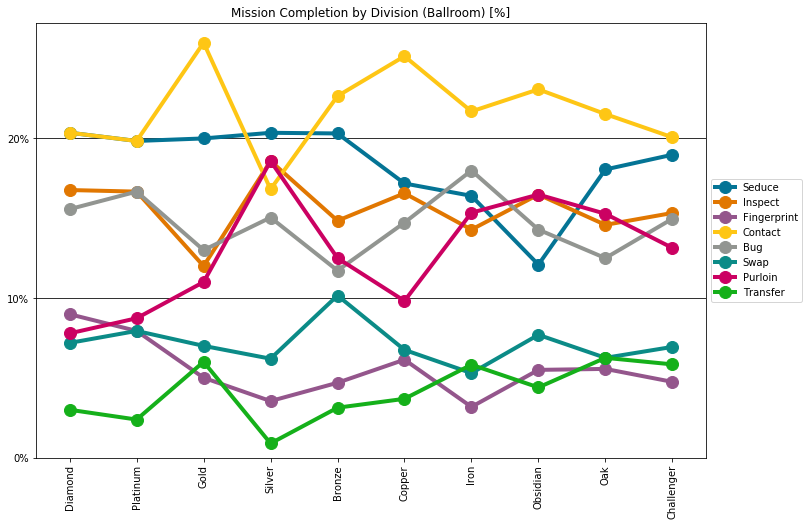

In [6]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    f"Mission Completion by Division ({venue})",
    groupby=lambda g: g.division,
    category_name_order=lambda g: SCL5_DIVISIONS.index(g),
    counts_plot=False,
    force_line=True,
)

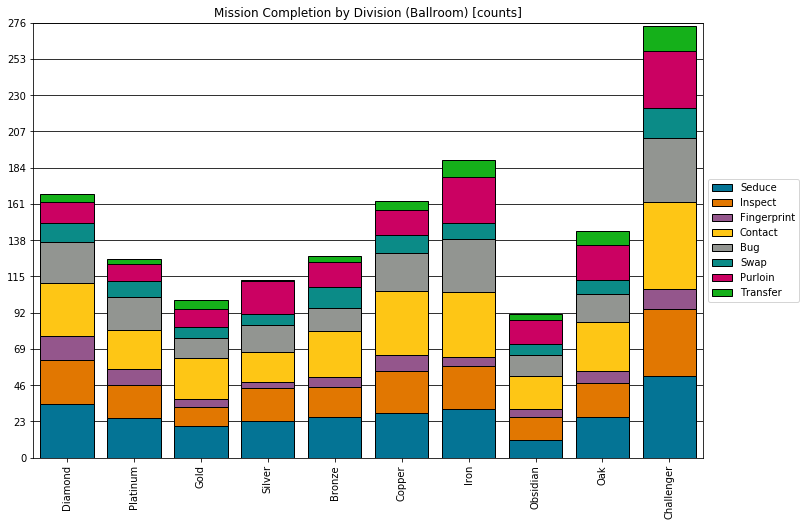

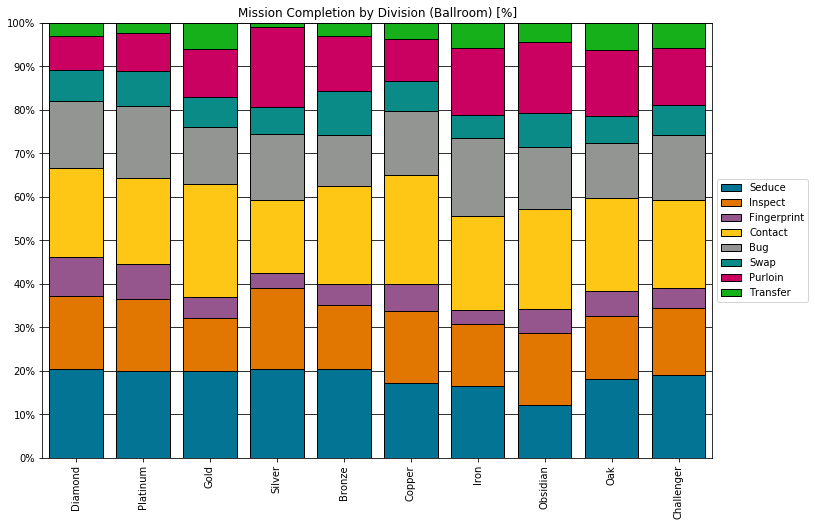

In [7]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    f"Mission Completion by Division ({venue})",
    groupby=lambda g: g.division,
    category_name_order=lambda g: SCL5_DIVISIONS.index(g)
)

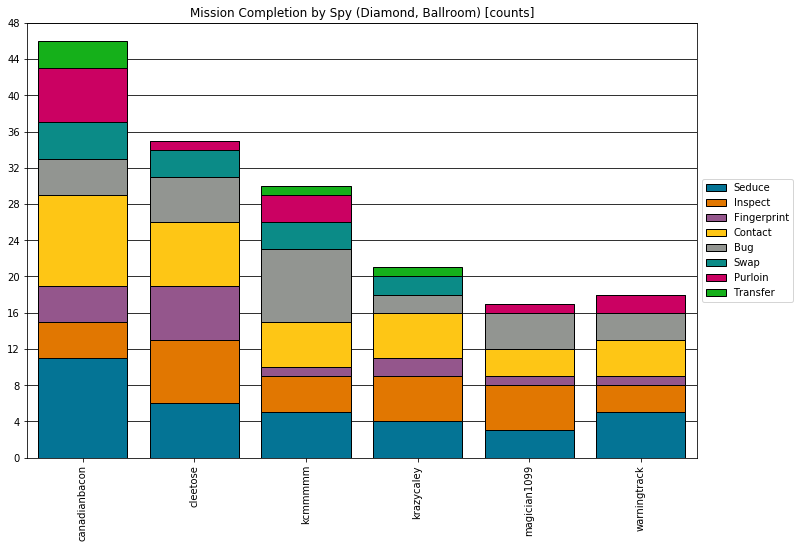

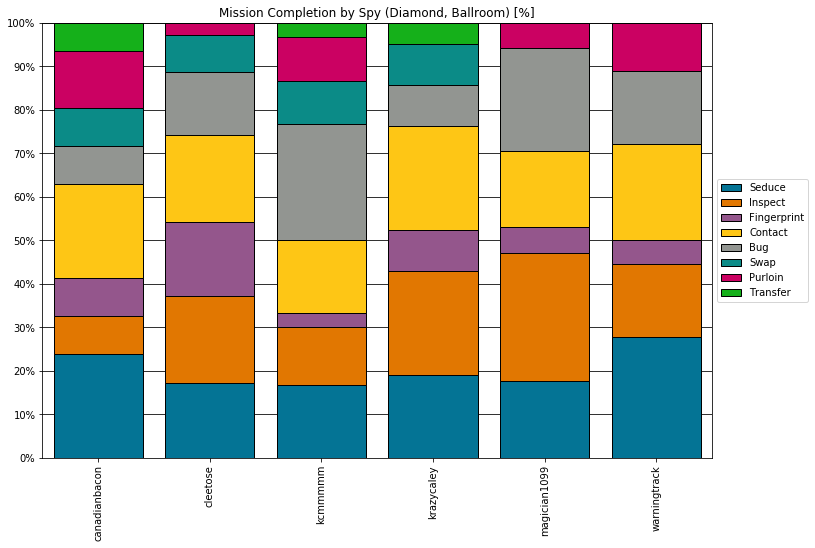

In [8]:
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.division == "Diamond" and g.venue=='Ballroom', scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    "Mission Completion by Spy (Diamond, Ballroom)",
    groupby=lambda g: g.spy,
)

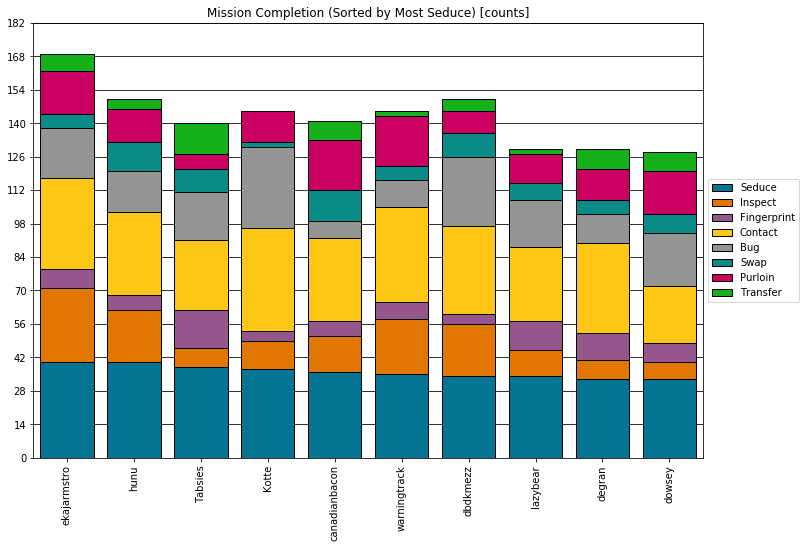

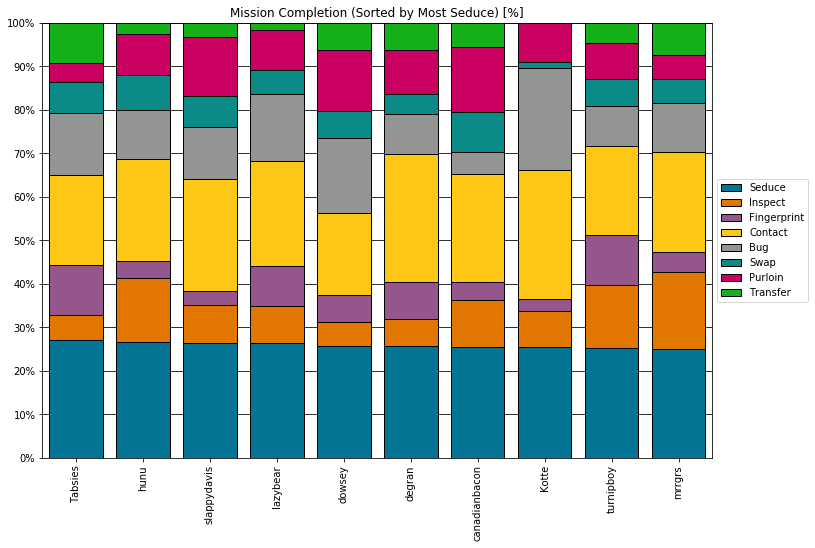

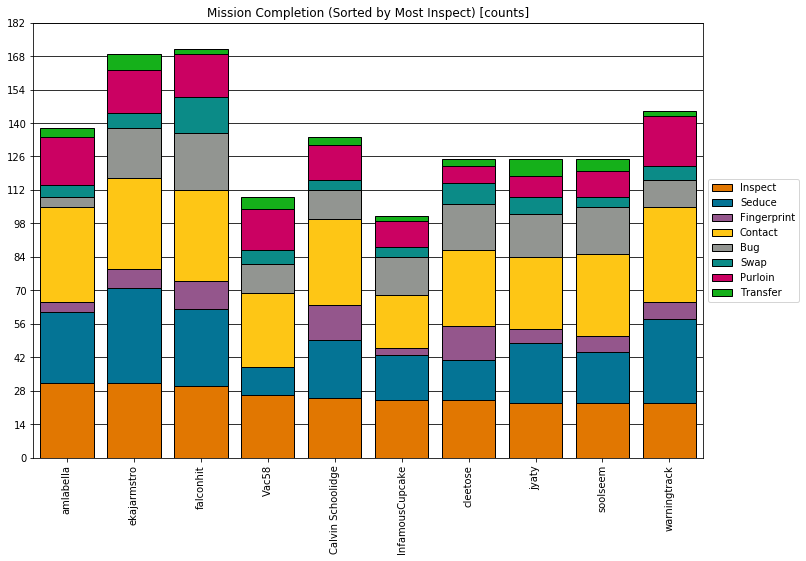

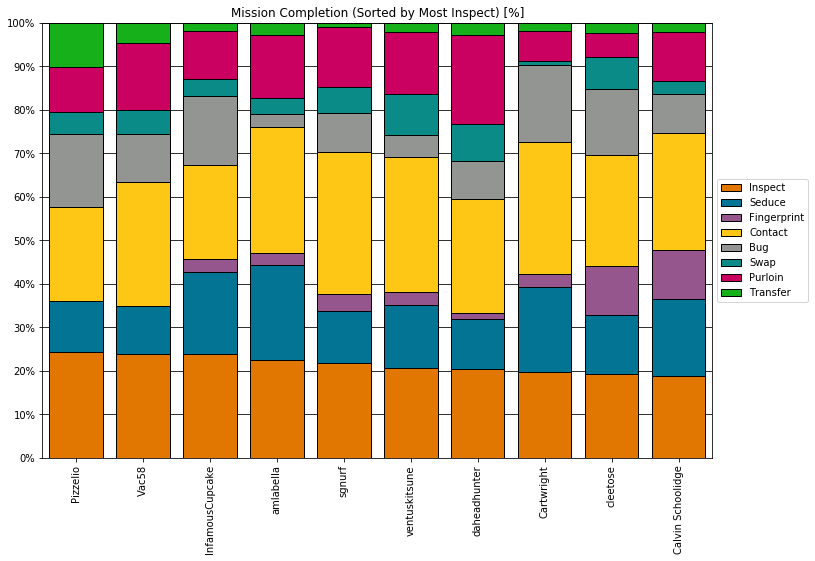

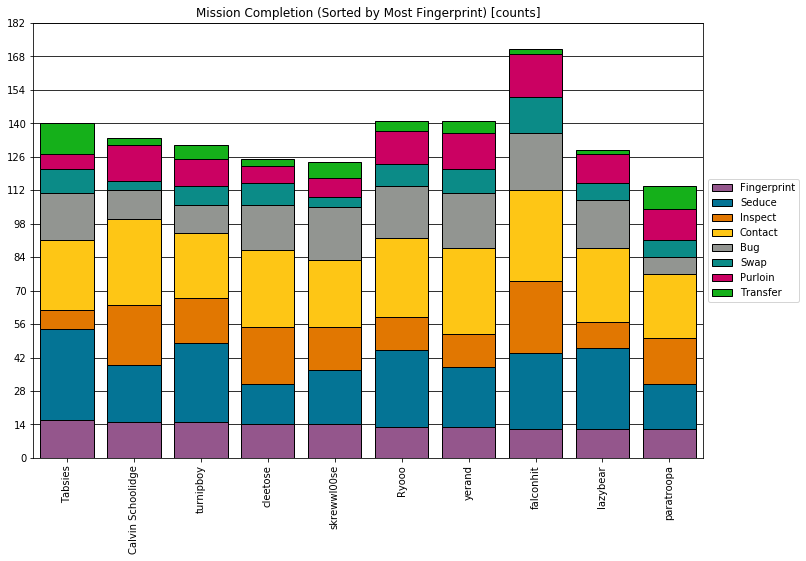

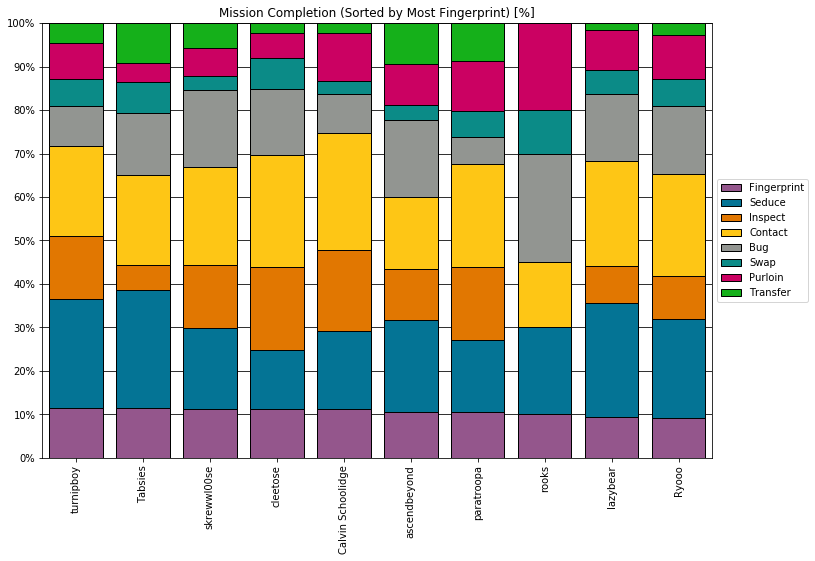

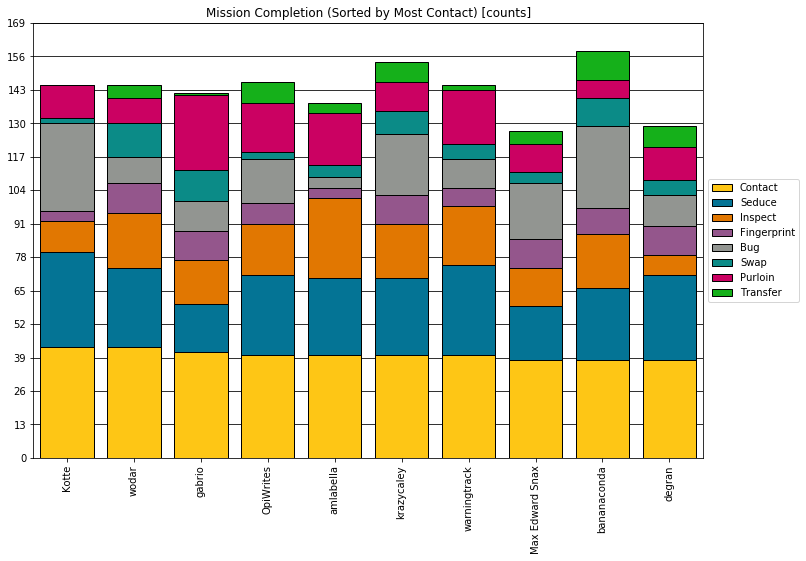

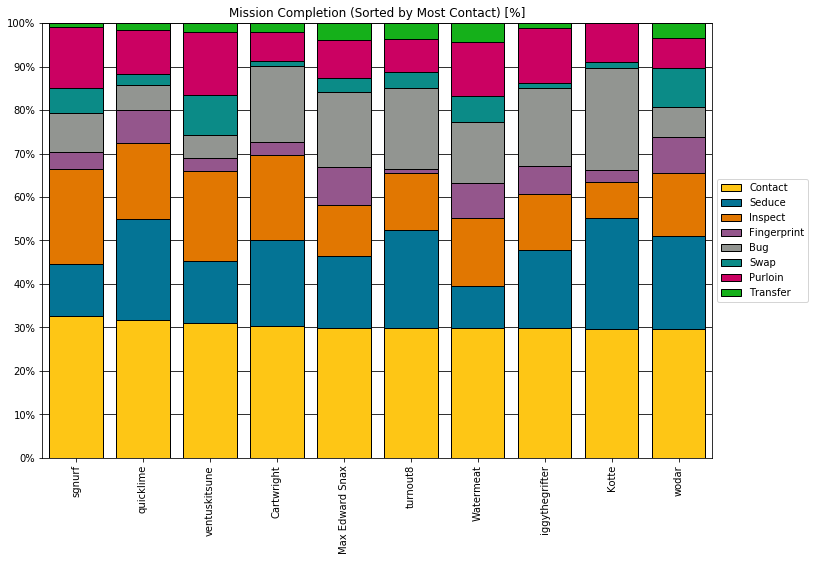

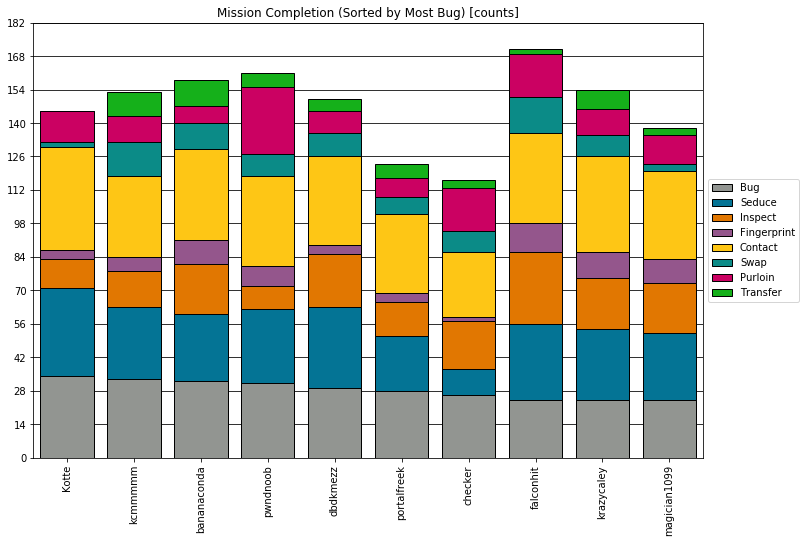

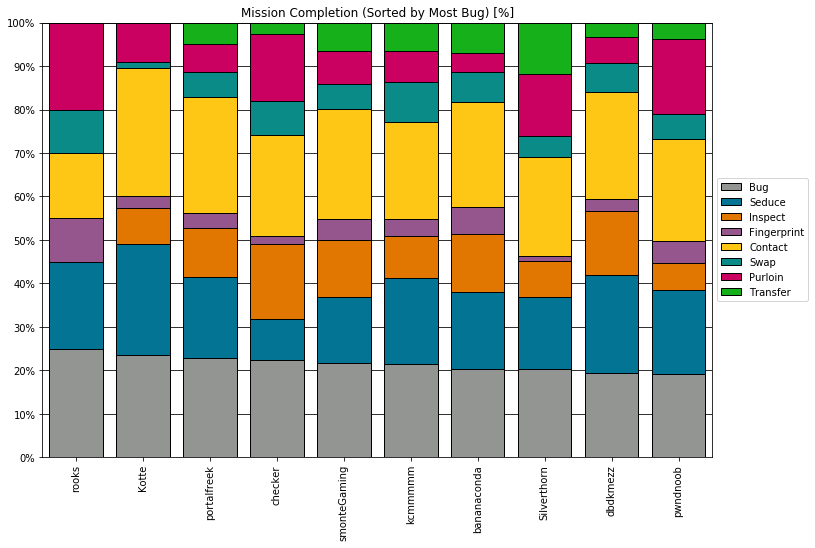

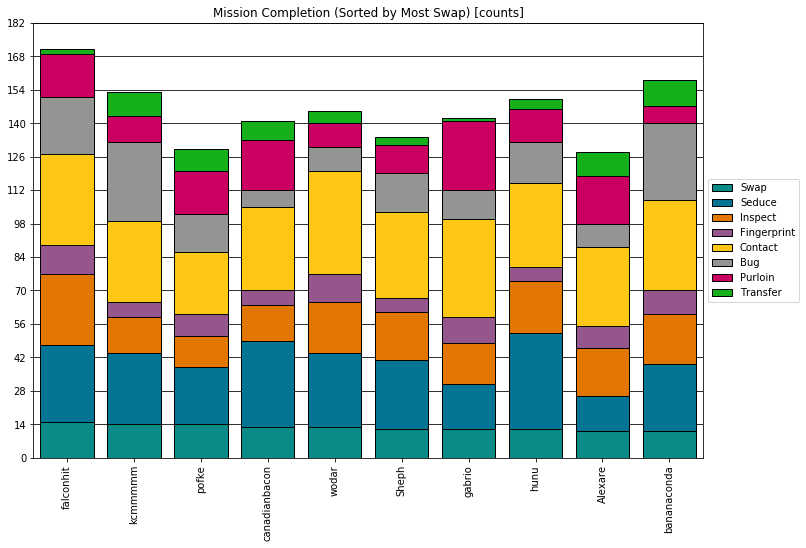

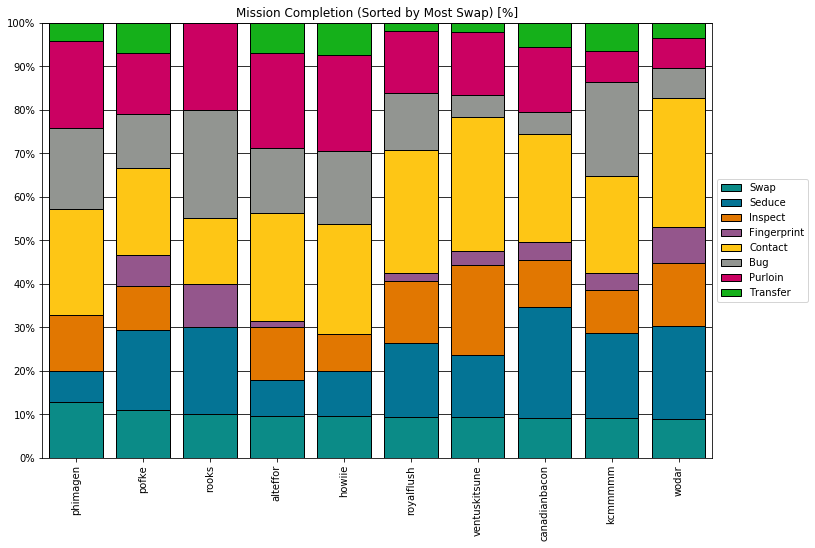

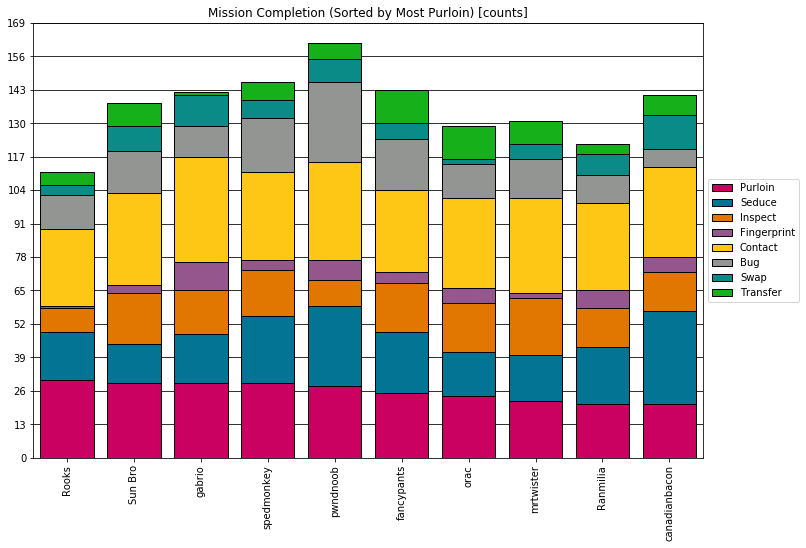

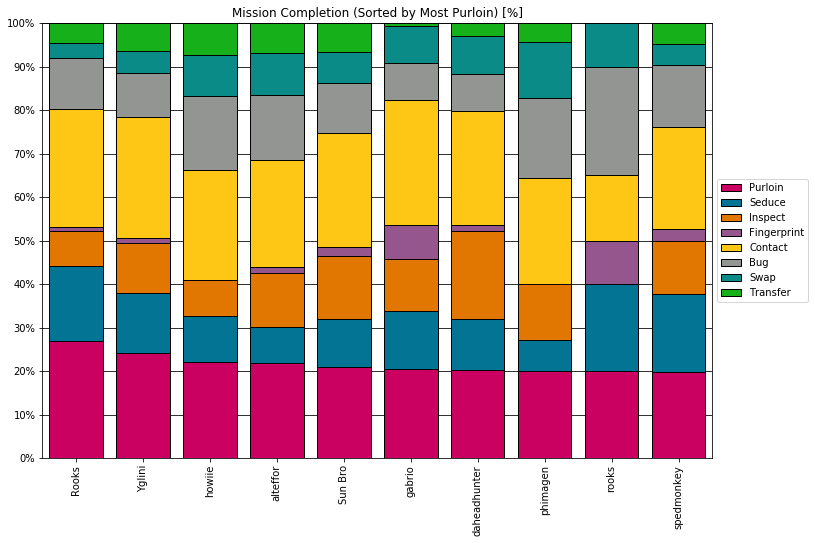

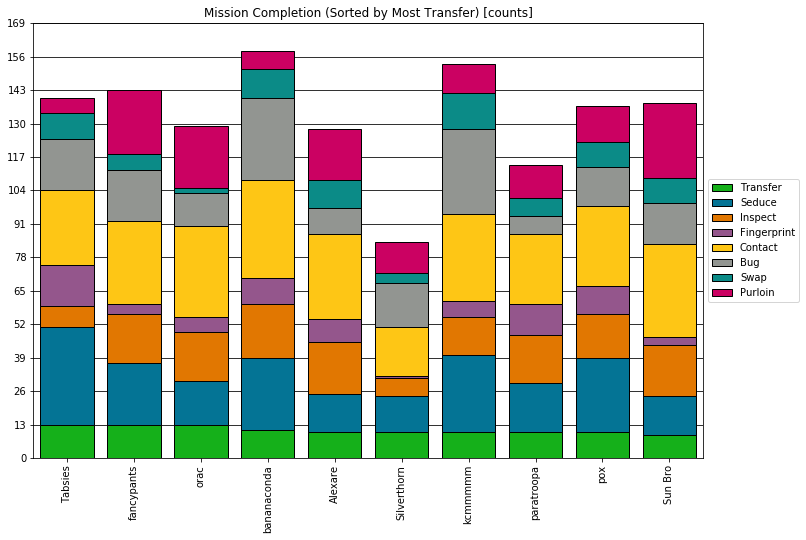

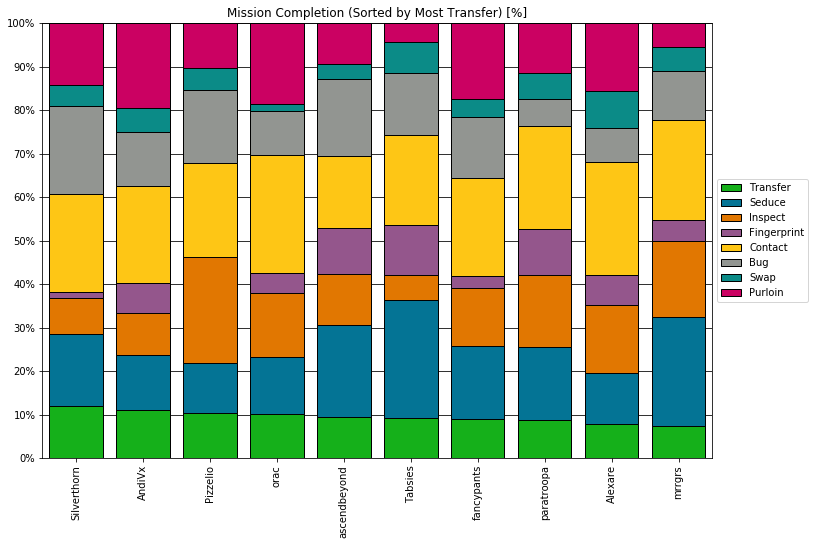

In [9]:
for m in Missions:
    if m != Missions.Zero:
        mission_completion_query(
            scl5_replays,
            f"Mission Completion (Sorted by Most {m.name})",
            groupby=lambda g: g.spy,
            category_data_order = m,
            data_stack_order = sorted([__m for __m in Missions if __m != Missions.Zero], key=lambda _m: _m != m),
            limit=10,
        )

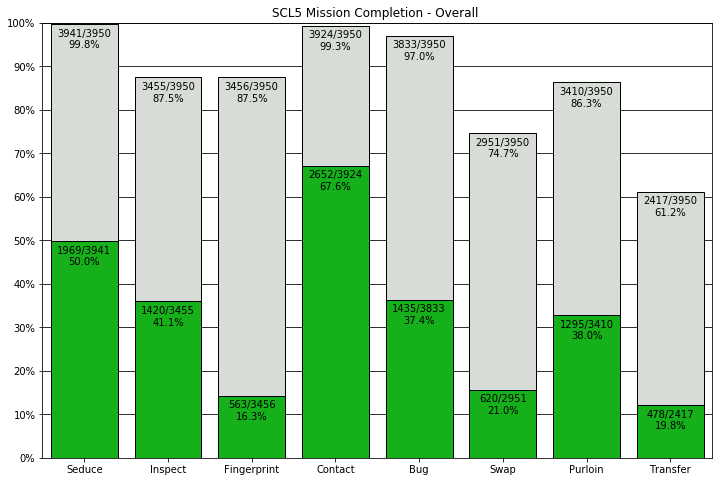

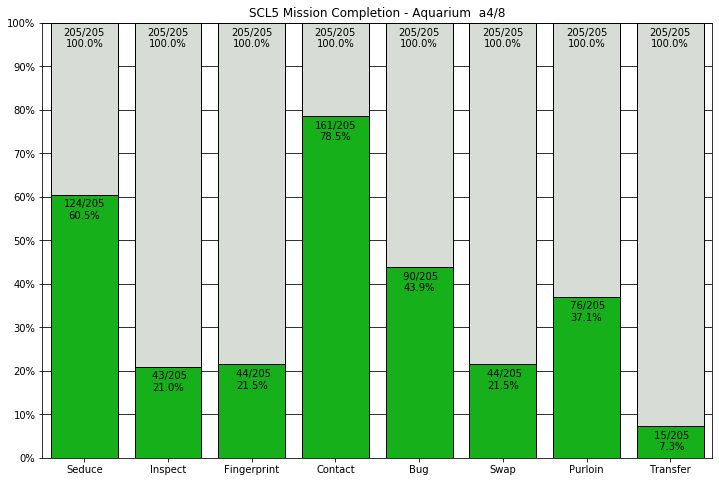

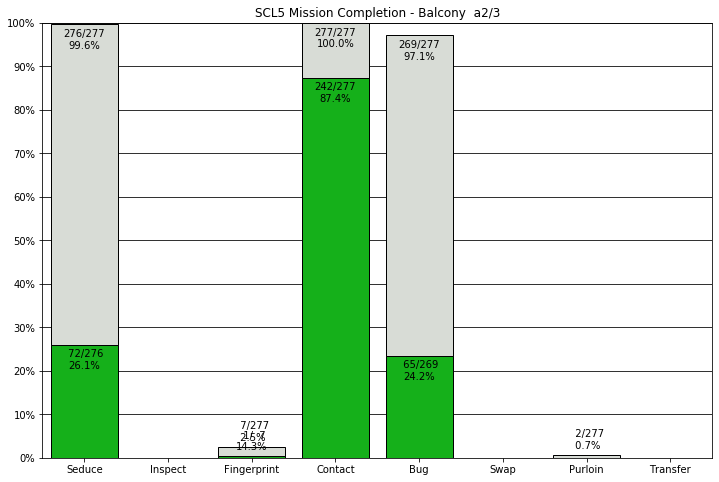

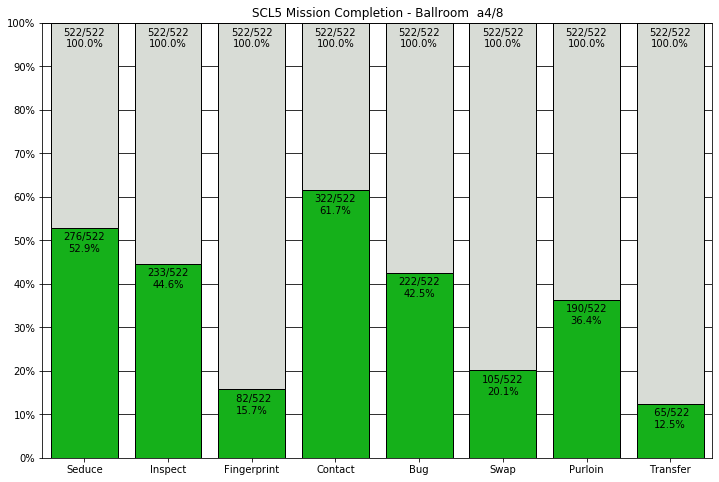

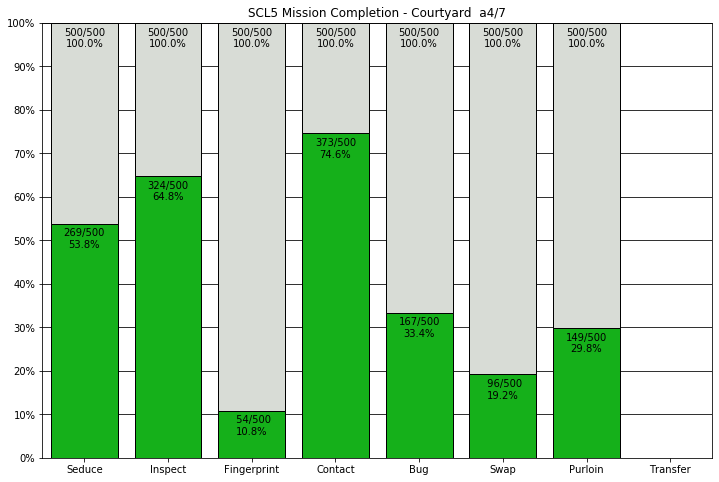

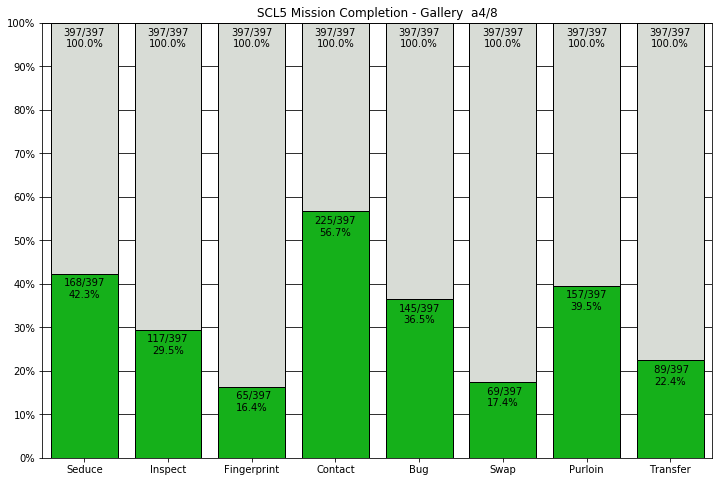

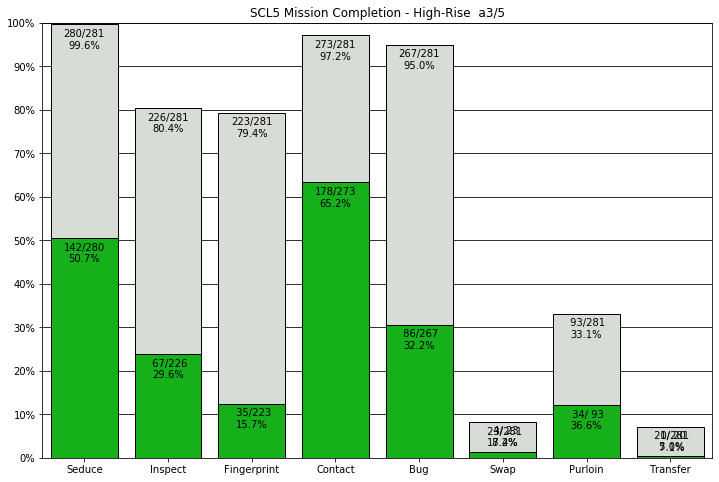

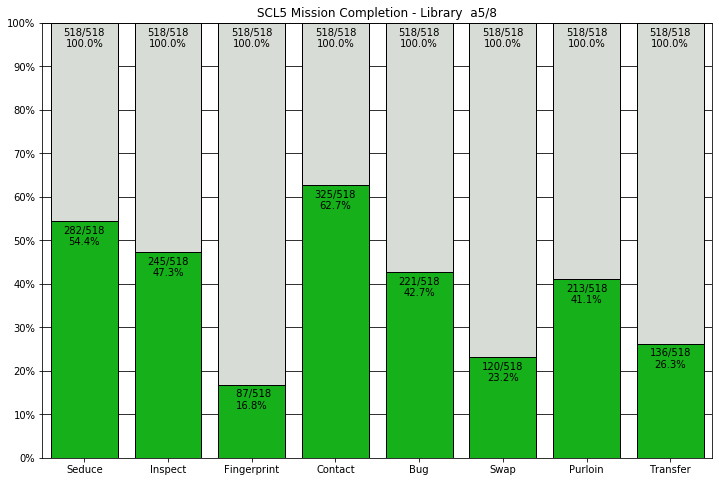

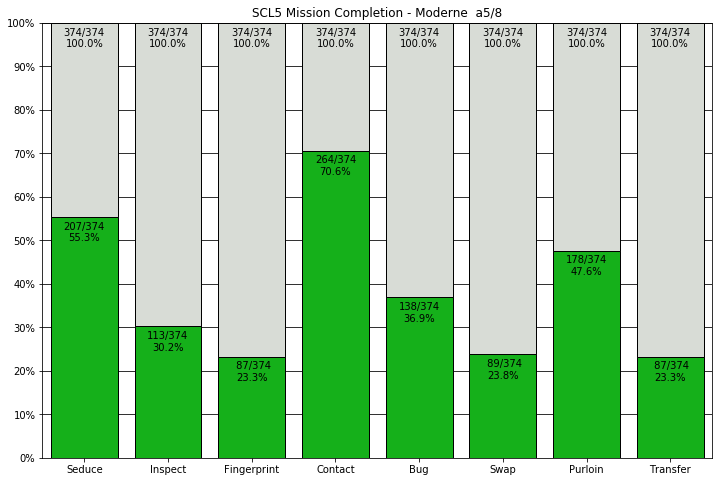

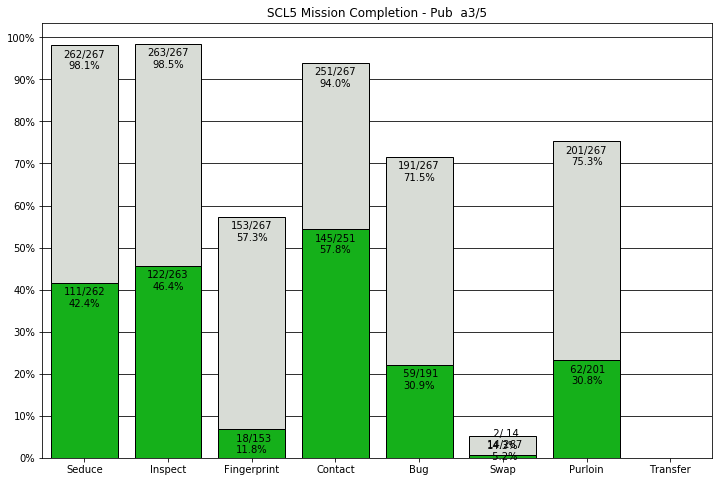

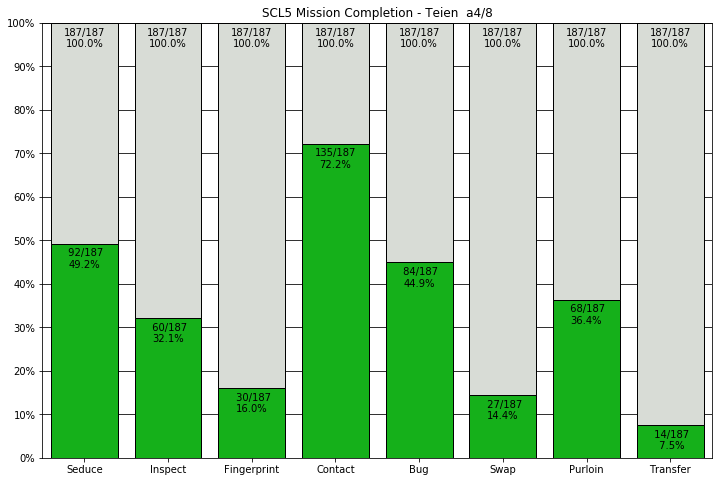

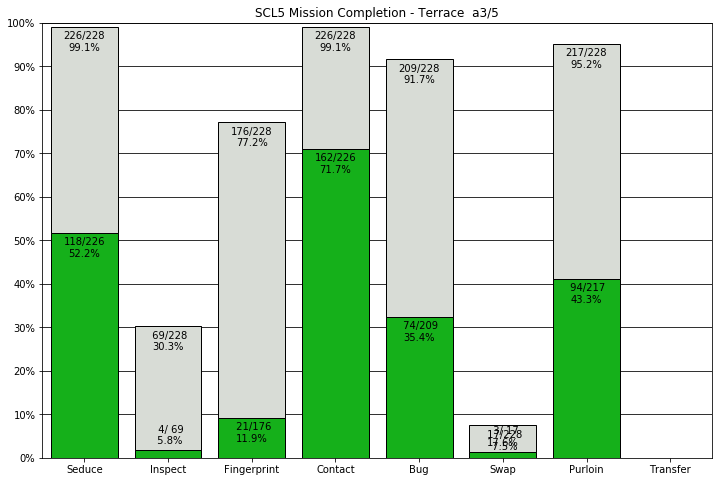

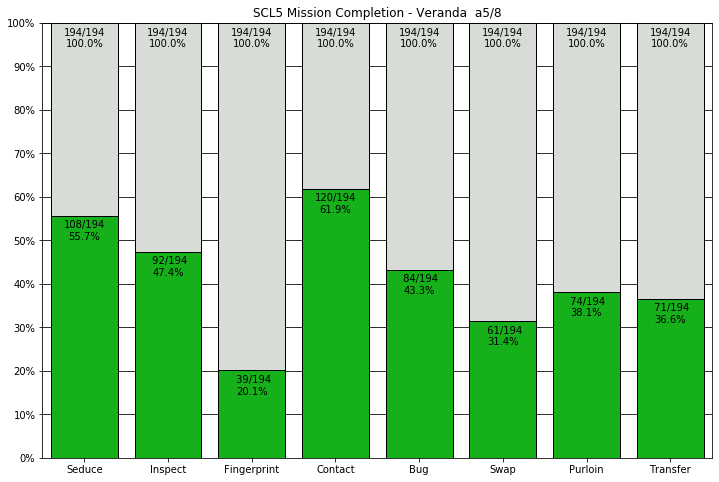

In [10]:
mission_completion(scl5_replays, "SCL5 Mission Completion", SCL5_VENUE_MODES)